# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [56]:
import requests
from bs4 import BeautifulSoup

In [57]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import spacy
import gensim
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from pprint import pprint


#### Saving the reviews in a data frame

In [59]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head(10)

,reviews
0,✅ Trip Verified | British Airways at its bes...
1,✅ Trip Verified | An excellent flight! Despite...
2,✅ Trip Verified | I recently traveled with Bri...
3,✅ Trip Verified | My family and I were booke...
4,Not Verified | We had to change from AA to BA...
5,✅ Trip Verified | After paying $6500 for ticke...
6,✅ Trip Verified | An excellent flight on BA Ci...
7,✅ Trip Verified | Crew were amazing and atte...
8,Not Verified | I flew internationally for the...
9,"✅ Trip Verified | BA, after subsequent delays ..."


#### Saving the dataframe in csv file

In [60]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

#### Explore Data

In [61]:
df.isnull().sum()

reviews    0
dtype: int64

In [62]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


,reviews
count,1000
unique,1000
top,✅ Trip Verified | British Airways at its bes...
freq,1


#### Data Cleaning

In [63]:
df['verified'] = df['reviews'].apply(lambda x: x.split('|')[0])
df ['reviews'] = df['reviews'].apply(lambda x: x.split('|')[1])
df

,reviews,verified
0,British Airways at its best. Outstanding se...,✅ Trip Verified
1,An excellent flight! Despite this being a 4.5...,✅ Trip Verified
2,I recently traveled with British Airways and ...,✅ Trip Verified
3,My family and I were booked to leave London...,✅ Trip Verified
4,We had to change from AA to BA for a flight ...,Not Verified
...,...,...
995,London to Vancouver. Economy was a lot more ...,Not Verified
996,"Newcastle to Delhi via London. At check-in , ...",❎ Not Verified
997,Miami to Delhi via London. The BA business ...,✅ Trip Verified
998,London to Sydney via Singapore. Checked in w...,Not Verified


In [64]:
df.loc[df['verified'] != '✅ Trip Verified ','verified'] = 'Not Verified'
df.loc[df['verified'] == '✅ Trip Verified ','verified'] = 'Trip Verified'
df

,reviews,verified
0,British Airways at its best. Outstanding se...,Trip Verified
1,An excellent flight! Despite this being a 4.5...,Trip Verified
2,I recently traveled with British Airways and ...,Trip Verified
3,My family and I were booked to leave London...,Trip Verified
4,We had to change from AA to BA for a flight ...,Not Verified
...,...,...
995,London to Vancouver. Economy was a lot more ...,Not Verified
996,"Newcastle to Delhi via London. At check-in , ...",Not Verified
997,Miami to Delhi via London. The BA business ...,Trip Verified
998,London to Sydney via Singapore. Checked in w...,Not Verified


In [65]:
df.reviews = df.reviews.str.strip()
df.reviews = df.reviews.str.lower()
df

,reviews,verified
0,british airways at its best. outstanding servi...,Trip Verified
1,an excellent flight! despite this being a 4.5 ...,Trip Verified
2,i recently traveled with british airways and h...,Trip Verified
3,my family and i were booked to leave london fo...,Trip Verified
4,we had to change from aa to ba for a flight to...,Not Verified
...,...,...
995,london to vancouver. economy was a lot more cr...,Not Verified
996,"newcastle to delhi via london. at check-in , i...",Not Verified
997,miami to delhi via london. the ba business cl...,Trip Verified
998,london to sydney via singapore. checked in wit...,Not Verified


In [66]:
df['verified'].value_counts()

verified
Trip Verified    752
Not Verified     248
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of verified or not verified trip')

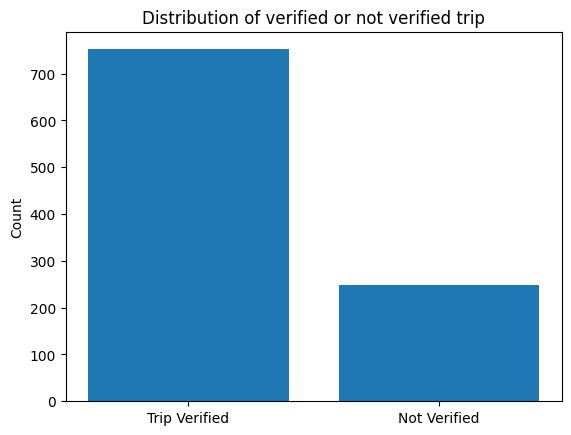

In [67]:
plt.bar(df.verified.value_counts().index, df.verified.value_counts().values)
plt.ylabel("Count")
plt.title("Distribution of verified or not verified trip")

In [68]:
df.info()
df.describe(include='all').T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   reviews   1000 non-null   object
 1   verified  1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


,count,unique,top,freq
reviews,1000,1000,british airways at its best. outstanding servi...,1
verified,1000,2,Trip Verified,752


#### Sentiment analysis of reviews

In [69]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

df['sentiment'] = df.reviews.apply(lambda x: sentiment_pipeline(x, max_length=512, truncation=True)[0]["label"])
df['confidence'] = df.reviews.apply(lambda x: sentiment_pipeline(x, max_length=512, truncation=True)[0]["score"])
df

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.
c:\Users\Yasser\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details

,reviews,verified,sentiment,confidence
0,british airways at its best. outstanding servi...,Trip Verified,POSITIVE,0.999744
1,an excellent flight! despite this being a 4.5 ...,Trip Verified,POSITIVE,0.999825
2,i recently traveled with british airways and h...,Trip Verified,NEGATIVE,0.997475
3,my family and i were booked to leave london fo...,Trip Verified,NEGATIVE,0.999776
4,we had to change from aa to ba for a flight to...,Not Verified,NEGATIVE,0.998891
...,...,...,...,...
995,london to vancouver. economy was a lot more cr...,Not Verified,POSITIVE,0.993287
996,"newcastle to delhi via london. at check-in , i...",Not Verified,NEGATIVE,0.998977
997,miami to delhi via london. the ba business cl...,Trip Verified,NEGATIVE,0.999750
998,london to sydney via singapore. checked in wit...,Not Verified,NEGATIVE,0.998582


In [70]:
df.sentiment.value_counts()

sentiment
NEGATIVE    760
POSITIVE    240
Name: count, dtype: int64

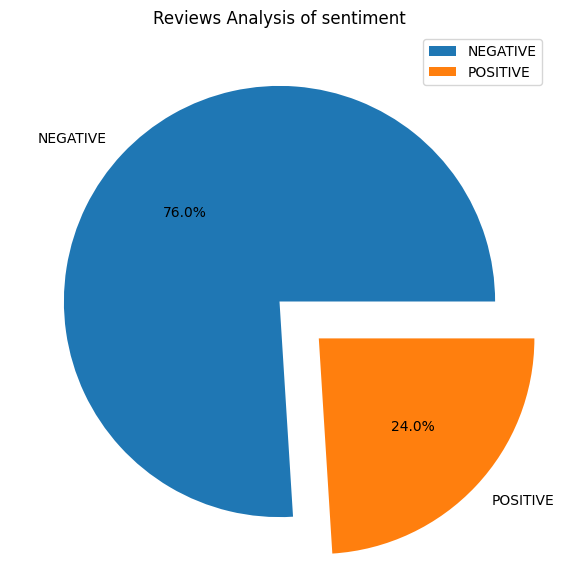

In [103]:
%matplotlib inline

plt.figure(figsize=(15,7))
plt.pie(df.sentiment.value_counts().values, labels=df.sentiment.value_counts().index, explode = (0, 0.25), autopct='%1.1f%%', shadow=False)
plt.title("Reviews Analysis of sentiment")
plt.legend()
plt.show()

In [72]:
df.groupby('verified')['sentiment'].value_counts()

verified       sentiment
Not Verified   NEGATIVE     204
               POSITIVE      44
Trip Verified  NEGATIVE     556
               POSITIVE     196
Name: count, dtype: int64

Text(0.5, 1.0, 'Sentiment Analysis by is_verified_trip')

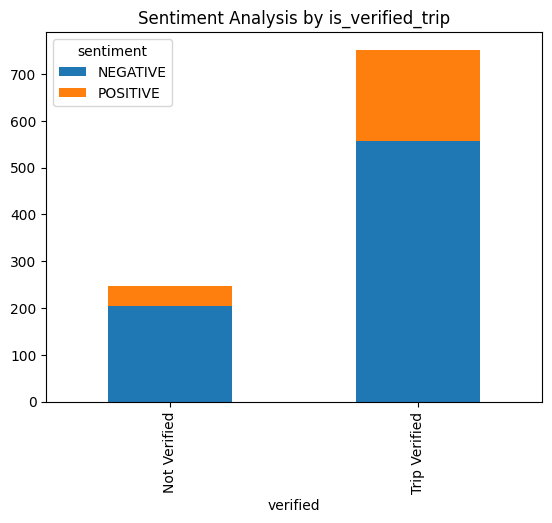

In [102]:
df.groupby('verified')['sentiment'].value_counts().unstack().plot.bar(stacked=True).set_title("Sentiment Analysis by is_verified_trip")

#### Text Cleaning

In [74]:
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams
from nltk import FreqDist

In [75]:
import string
from nltk.corpus import stopwords

# Convert to lower case
df['review_text'] = df.reviews.str.lower()

# Remove punctuation and numbers
df.review_text = df.review_text.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation + string.digits)))

# Remove stop words
stop_words = stopwords.words("english")
stop_words.extend(['british','airway','airline','ba','flight'])
stop_words = set(stop_words)
df.review_text = df.review_text.apply(lambda x: " ".join(word for word in x.split() if word.lower() not in stop_words))


# Perform lemmatization 
lemmatizer = WordNetLemmatizer()
df.review_text = df.review_text.apply(lambda x: " ".join([lemmatizer.lemmatize(word) 
                                                                    for word in x.split() if len(word)> 3]))
df

,reviews,verified,sentiment,confidence,review_text
0,british airways at its best. outstanding servi...,Trip Verified,POSITIVE,0.999744,airway best outstanding service attendant dinn...
1,an excellent flight! despite this being a 4.5 ...,Trip Verified,POSITIVE,0.999825,excellent despite hour configured short hop ed...
2,i recently traveled with british airways and h...,Trip Verified,NEGATIVE,0.997475,recently traveled airway mixed experience book...
3,my family and i were booked to leave london fo...,Trip Verified,NEGATIVE,0.999776,family booked leave london hong kong august ma...
4,we had to change from aa to ba for a flight to...,Not Verified,NEGATIVE,0.998891,change london missed connection process bag de...
...,...,...,...,...,...
995,london to vancouver. economy was a lot more cr...,Not Verified,POSITIVE,0.993287,london vancouver economy cramped expected cram...
996,"newcastle to delhi via london. at check-in , i...",Not Verified,NEGATIVE,0.998977,newcastle delhi london checkin charged carryin...
997,miami to delhi via london. the ba business cl...,Trip Verified,NEGATIVE,0.999750,miami delhi london business class flew first t...
998,london to sydney via singapore. checked in wit...,Not Verified,NEGATIVE,0.998582,london sydney singapore checked allowance made...


In [76]:
df.reviews = df.reviews.str.replace("[^\w\s_-.;,]","")
df.review_text = df.review_text.str.replace("[^\w\s_-.;,]","")
df.tail

<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:2: SyntaxWarning: invalid escape sequence '\w'
<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:2: SyntaxWarning: invalid escape sequence '\w'
C:\Users\Yasser\AppData\Local\Temp\ipykernel_9420\3639841090.py:1: SyntaxWarning: invalid escape sequence '\w'
  df.reviews = df.reviews.str.replace("[^\w\s_-.;,]","")
C:\Users\Yasser\AppData\Local\Temp\ipykernel_9420\3639841090.py:2: SyntaxWarning: invalid escape sequence '\w'
  df.review_text = df.review_text.str.replace("[^\w\s_-.;,]","")


<bound method NDFrame.tail of                                                reviews       verified  \
0    british airways at its best. outstanding servi...  Trip Verified   
1    an excellent flight! despite this being a 4.5 ...  Trip Verified   
2    i recently traveled with british airways and h...  Trip Verified   
3    my family and i were booked to leave london fo...  Trip Verified   
4    we had to change from aa to ba for a flight to...   Not Verified   
..                                                 ...            ...   
995  london to vancouver. economy was a lot more cr...   Not Verified   
996  newcastle to delhi via london. at check-in , i...   Not Verified   
997  miami to delhi via london.  the ba business cl...  Trip Verified   
998  london to sydney via singapore. checked in wit...   Not Verified   
999  phoenix to amsterdam via london. it was 10 hrs...  Trip Verified   

    sentiment  confidence                                        review_text  
0    POSITIVE 

In [77]:
#Function to clean the text
def clean(txt):
    text = re.sub('[^A-Za-z]+', ' ', str(txt))
    return text

# Cleaning the text in the review column
df.reviews = df.reviews.apply(clean)
df.reviews_text = df.review_text.apply(clean)
df

C:\Users\Yasser\AppData\Local\Temp\ipykernel_9420\2486637595.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.reviews_text = df.review_text.apply(clean)


,reviews,verified,sentiment,confidence,review_text
0,british airways at its best outstanding servic...,Trip Verified,POSITIVE,0.999744,airway best outstanding service attendant dinn...
1,an excellent flight despite this being a hour ...,Trip Verified,POSITIVE,0.999825,excellent despite hour configured short hop ed...
2,i recently traveled with british airways and h...,Trip Verified,NEGATIVE,0.997475,recently traveled airway mixed experience book...
3,my family and i were booked to leave london fo...,Trip Verified,NEGATIVE,0.999776,family booked leave london hong kong august ma...
4,we had to change from aa to ba for a flight to...,Not Verified,NEGATIVE,0.998891,change london missed connection process bag de...
...,...,...,...,...,...
995,london to vancouver economy was a lot more cra...,Not Verified,POSITIVE,0.993287,london vancouver economy cramped expected cram...
996,newcastle to delhi via london at check in i wa...,Not Verified,NEGATIVE,0.998977,newcastle delhi london checkin charged carryin...
997,miami to delhi via london the ba business clas...,Trip Verified,NEGATIVE,0.999750,miami delhi london business class flew first t...
998,london to sydney via singapore checked in with...,Not Verified,NEGATIVE,0.998582,london sydney singapore checked allowance made...


In [78]:
from wordcloud import WordCloud

In [79]:
# Get positive bigrams and their frequency
bigrams = list(ngrams(df[df.sentiment == 'POSITIVE']['review_text'].str.cat(sep=' ').split(), 2))
bigrams_fd = FreqDist(bigrams)
bigrams_fd = {'_'.join(bigram): freq for bigram, freq in bigrams_fd.items()}
bigrams_fd

{'airway_best': 3,
 'best_outstanding': 1,
 'outstanding_service': 3,
 'service_attendant': 1,
 'attendant_dinner': 1,
 'dinner_good': 2,
 'good_though': 2,
 'though_breakfast': 2,
 'breakfast_could': 2,
 'could_better': 6,
 'better_excellent': 2,
 'excellent_flat': 1,
 'flat_seat': 1,
 'seat_extremely': 1,
 'extremely_comfortable': 2,
 'comfortable_pleasant': 1,
 'pleasant_board': 1,
 'board_excellent': 2,
 'excellent_despite': 1,
 'despite_hour': 1,
 'hour_configured': 1,
 'configured_short': 1,
 'short_hop': 1,
 'hop_edinburgh': 1,
 'edinburgh_glasgow': 1,
 'glasgow_despite': 1,
 'despite_ended': 1,
 'ended_really': 1,
 'really_enjoying': 1,
 'enjoying_dont': 1,
 'dont_know': 3,
 'know_really': 1,
 'really_expectation': 1,
 'expectation_thought': 1,
 'thought_crew': 1,
 'crew_fabulous': 1,
 'fabulous_food': 1,
 'food_wine': 5,
 'wine_surprisingly': 1,
 'surprisingly_good': 7,
 'good_plane': 1,
 'plane_looked': 1,
 'looked_perfect': 1,
 'perfect_condition': 1,
 'condition_start': 1,


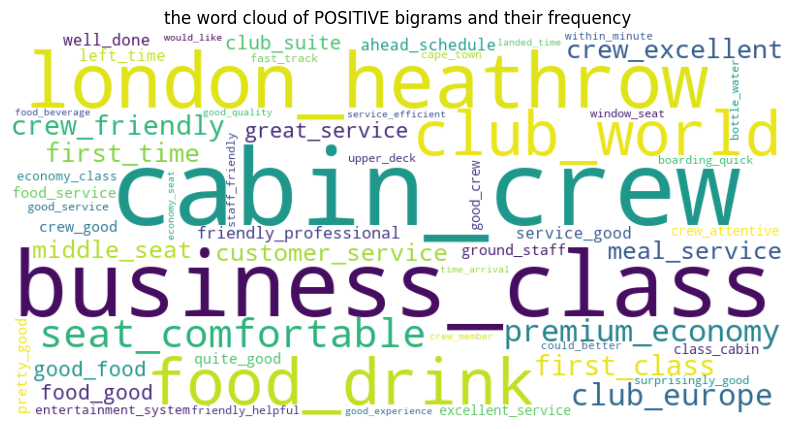

In [80]:
wordcloud = WordCloud(width=800, height=400, min_font_size = 10, background_color ='white',)
# Generate the word cloud
wordcloud.generate_from_frequencies(bigrams_fd)

# Show the word cloud
plt.figure(figsize=(10,10), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("the word cloud of POSITIVE bigrams and their frequency")
plt.axis("off")
plt.show()



In [81]:
# Get negative bigrams and their frequency
bigrams_ng = list(ngrams(df[df.sentiment == 'NEGATIVE']['review_text'].str.cat(sep=' ').split(), 2))
bigrams_fd_ng = FreqDist(bigrams_ng)
bigrams_fd_ng = {'_'.join(bigram): freq for bigram, freq in bigrams_fd_ng.items()}
bigrams_fd_ng

{'recently_traveled': 1,
 'traveled_airway': 2,
 'airway_mixed': 1,
 'mixed_experience': 1,
 'experience_booking': 2,
 'booking_checkin': 1,
 'checkin_booking': 1,
 'booking_process': 3,
 'process_straightforward': 1,
 'straightforward_experience': 1,
 'experience_baggage': 1,
 'baggage_counter': 1,
 'counter_frustrating': 1,
 'frustrating_line': 1,
 'line_three': 1,
 'three_employee': 1,
 'employee_counter': 1,
 'counter_took': 1,
 'took_minute': 11,
 'minute_break': 1,
 'break_processing': 1,
 'processing_luggage': 1,
 'luggage_caused': 1,
 'caused_unnecessary': 1,
 'unnecessary_delay': 1,
 'delay_flight': 1,
 'flight_london': 6,
 'london_fine': 2,
 'fine_enjoyed': 1,
 'enjoyed_time': 1,
 'time_lounge': 1,
 'lounge_layover': 1,
 'layover_despite': 1,
 'despite_delay': 1,
 'delay_connecting': 2,
 'connecting_also': 2,
 'also_fine': 1,
 'fine_baggage': 1,
 'baggage_issue': 1,
 'issue_unfortunately': 1,
 'unfortunately_luggage': 1,
 'luggage_make': 5,
 'make_onto': 4,
 'onto_arrived': 1

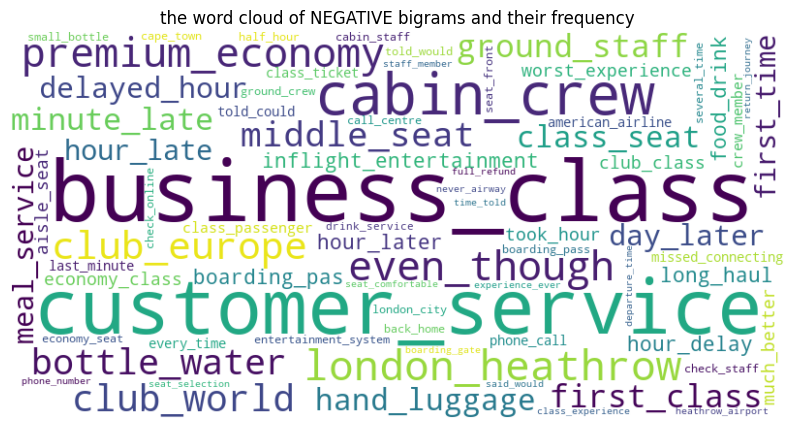

In [82]:
wordcloud = WordCloud(width=800, height=400, min_font_size = 10, background_color ='white',)
# Generate the word cloud
wordcloud.generate_from_frequencies(bigrams_fd_ng)

# Show the word cloud
plt.figure(figsize=(10,10), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("the word cloud of NEGATIVE bigrams and their frequency")
plt.show()

##### Natural Language Processing NLP

In [83]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  #deacc=True : to remove punctuations

words = list(sent_to_words(df.reviews.tolist()))

print(words[0])

['british', 'airways', 'at', 'its', 'best', 'outstanding', 'service', 'from', 'the', 'flight', 'attendants', 'dinner', 'very', 'good', 'though', 'breakfast', 'could', 'be', 'better', 'excellent', 'ife', 'the', 'lie', 'flat', 'seat', 'is', 'extremely', 'comfortable', 'very', 'pleasant', 'flight', 'on', 'board', 'an']


In [84]:
import nltk

from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk import pos_tag

nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('omw-1.4')

try:
    nltk.data.find('tokenizers/punkt')
    nltk.data.find('taggers/averaged_perceptron_tagger')
    nltk.data.find('corpora/stopwords')
    nltk.data.find('corpora/wordnet')
    print("Toutes les ressources nécessaires sont disponibles.")
except LookupError as e:
    print(f"Ressource manquante : {e}")


Toutes les ressources nécessaires sont disponibles.


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Yasser\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Yasser\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Yasser\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yasser\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Yasser\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


##### Tokenize the review column

In [85]:
"""
# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(text_in):
    tags = pos_tag(word_tokenize(text_in))
    newlist = []
    for word, tag in tags:
        if word not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist 

df['POS_tagged'] = df.reviews.apply(token_stop_pos)
df



df.reviews = df.apply(lambda row: nltk.word_tokenize(row['reviews']), axis=1)
df
"""

"\n# POS tagger dictionary\npos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}\n\ndef token_stop_pos(text_in):\n    tags = pos_tag(word_tokenize(text_in))\n    newlist = []\n    for word, tag in tags:\n        if word not in set(stopwords.words('english')):\n            newlist.append(tuple([word, pos_dict.get(tag[0])]))\n    return newlist \n\ndf['POS_tagged'] = df.reviews.apply(token_stop_pos)\ndf\n\n\n\ndf.reviews = df.apply(lambda row: nltk.word_tokenize(row['reviews']), axis=1)\ndf\n"

In [86]:
def lemmatization(texts_in, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts_in:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out


nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])  # Initialize spacy 'en' model, keeping only tagger component (for efficiency)
data_lemmatized = lemmatization(words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']) #keeping only Noun, Adj, Verb, Adverb

data_lemmatized

['good outstanding service flight attendant dinner very good breakfast well excellent ife lie flat seat extremely comfortable very pleasant flight board',
 'excellent flight hour flight configure short hop glasgow ife end really enjoy flight don know just really low expectation think crew fabulous food wine surprisingly good plane look very new perfect condition very start really like crew all cheerful genuine clearly enjoy work notice constantly friendly proactive interaction passenger food drink come generous wine happily provide top up later flight food box deceptively small actually contain decent selection food more enough keep feel satisfied trip regular detailed update cockpit also appreciate so hard product flight limit service genuine enjoyment crew win',
 'recently travel mixed experience booking check booking process straightforward experience baggage counter frustrating line employee counter take minute break process luggage cause unnecessary delay flight flight fine enjoy 

In [87]:
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=10,                        # minimum reqd occurences of a word 
                             stop_words='english',             # remove stop words
                             lowercase=True,                   # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}',  # num chars > 3
                             # max_features=50000,             # max number of uniq words
                            )

data_vectorized = vectorizer.fit_transform(data_lemmatized)
data_vectorized

<1000x881 sparse matrix of type '<class 'numpy.int64'>'
	with 38523 stored elements in Compressed Sparse Row format>

In [88]:
data_dense = data_vectorized.todense() # Materialize the sparse data

# Compute Sparsicity = Percentage of Non-Zero cells
print("Data Sparsicity: ", ((data_dense > 0).sum()/data_dense.size)*100, "%")

Data Sparsicity:  4.372644721906924 %


##### Build LDA Model

In [89]:
lda_model = LatentDirichletAllocation(n_components=4,               # Number of topics
                                      max_iter=10,               # Max learning iterations
                                      learning_method='online',   
                                      random_state=100,          # Random state
                                      batch_size=128,            # n docs in each learning iter
                                      evaluate_every = -1,       # compute perplexity every n iters, default: Don't
                                      n_jobs = -1,               # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)

lda_model

LatentDirichletAllocation(learning_method='online', n_components=4, n_jobs=-1,
                          random_state=100)

In [105]:
# Create Document - Topic Matrix
lda_output = lda_model.transform(data_vectorized)

# column names
topic_names = ["Topic" + str(i) for i in range(lda_model.n_components)]

# index names
doc_names = ["Doc" + str(i) for i in range(len(df))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topic_names, index=doc_names)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic


# Apply Style
df_document_topics = df_document_topic.head(15)
df_document_topics

,Topic0,Topic1,Topic2,Topic3,dominant_topic
Doc0,0.96,0.01,0.01,0.01,0
Doc1,0.94,0.00,0.05,0.00,0
Doc2,0.00,0.00,0.99,0.00,2
Doc3,0.01,0.01,0.01,0.98,3
Doc4,0.00,0.00,0.10,0.89,3
Doc5,0.39,0.01,0.36,0.24,0
Doc6,0.92,0.06,0.01,0.01,0
Doc7,0.71,0.02,0.26,0.02,0
Doc8,0.00,0.00,0.99,0.00,2
Doc9,0.13,0.00,0.08,0.78,3


In [91]:
df_document_topic.shape

(1000, 5)

In [92]:
topics__ = df_document_topic['dominant_topic'].tolist()
df['topic'] = topics__
df

,reviews,verified,sentiment,confidence,review_text,topic
0,british airways at its best outstanding servic...,Trip Verified,POSITIVE,0.999744,airway best outstanding service attendant dinn...,0
1,an excellent flight despite this being a hour ...,Trip Verified,POSITIVE,0.999825,excellent despite hour configured short hop ed...,0
2,i recently traveled with british airways and h...,Trip Verified,NEGATIVE,0.997475,recently traveled airway mixed experience book...,2
3,my family and i were booked to leave london fo...,Trip Verified,NEGATIVE,0.999776,family booked leave london hong kong august ma...,3
4,we had to change from aa to ba for a flight to...,Not Verified,NEGATIVE,0.998891,change london missed connection process bag de...,3
...,...,...,...,...,...,...
995,london to vancouver economy was a lot more cra...,Not Verified,POSITIVE,0.993287,london vancouver economy cramped expected cram...,0
996,newcastle to delhi via london at check in i wa...,Not Verified,NEGATIVE,0.998977,newcastle delhi london checkin charged carryin...,2
997,miami to delhi via london the ba business clas...,Trip Verified,NEGATIVE,0.999750,miami delhi london business class flew first t...,0
998,london to sydney via singapore checked in with...,Not Verified,NEGATIVE,0.998582,london sydney singapore checked allowance made...,2


Text(0.5, 1.0, 'Topic by sentiment')

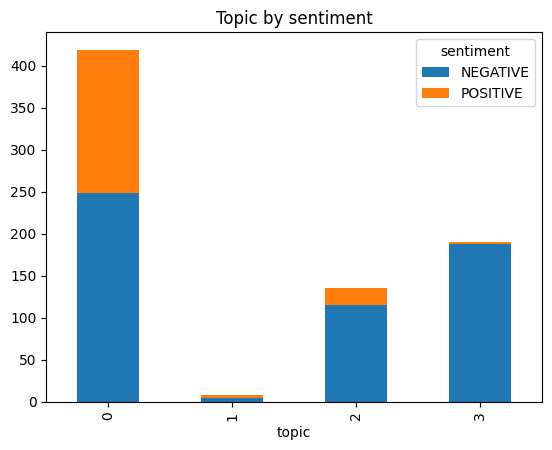

In [106]:
df[df['verified'] == 'Trip Verified'].groupby(['topic'])['sentiment'].value_counts().unstack().plot.bar(stacked=True).set_title("Topic by sentiment")

In [94]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda_model.score(data_vectorized))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(data_vectorized))

# See model parameters
pprint(lda_model.get_params())

Log Likelihood:  -304846.5743912898
Perplexity:  424.66671053264344
{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.7,
 'learning_method': 'online',
 'learning_offset': 10.0,
 'max_doc_update_iter': 100,
 'max_iter': 10,
 'mean_change_tol': 0.001,
 'n_components': 4,
 'n_jobs': -1,
 'perp_tol': 0.1,
 'random_state': 100,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}


In [95]:
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

,Topic Num,Num Documents
0,0,530
1,3,257
2,2,205
3,1,8


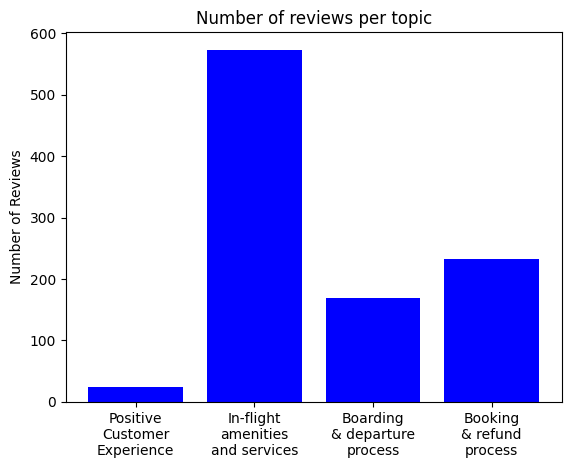

In [96]:
plt.bar(range(1,5,1),[25,573,169,233], color="blue")
plt.ylabel("Number of Reviews")
plt.title("Number of reviews per topic")
x_labels = (["Positive\nCustomer\nExperience", "In-flight\namenities\nand services",
            "Boarding\n& departure\nprocess","Booking\n& refund\nprocess"])
plt.xticks(range(1,5), x_labels)
# Show the graph
plt.show()

In [97]:
# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(lda_model.components_)

# Assign Column and Index
df_topic_keywords.columns = vectorizer.get_feature_names_out()
topicnames = ["Topic" + str(i) for i in range(lda_model.n_components)]
df_topic_keywords.index = topicnames
df_topic_keywords

,able,absolute,absolutely,accept,acceptable,access,accommodation,account,actually,add,...,wonderful,word,work,world,worth,wouldn,write,wrong,year,young
Topic0,17.186743,0.268320,5.106079,0.753961,18.777680,23.216239,0.260561,1.486622,31.138046,22.971501,...,12.630663,4.545807,86.288134,83.179520,31.650980,0.312581,6.025575,6.969863,61.727465,11.226193
Topic1,0.287561,0.252419,0.285695,0.259384,0.270416,0.254611,0.251557,0.354794,0.271484,0.350390,...,0.254405,0.251789,4.031479,0.256589,0.252543,0.255248,0.256332,0.323947,0.264948,0.253620
Topic2,8.062461,6.022270,19.198709,3.520417,4.533970,2.873198,8.706668,1.538772,7.797909,2.514417,...,3.609390,0.256463,20.029090,3.474829,0.283135,0.303888,9.665602,4.651655,19.393616,0.355133
Topic3,49.016745,7.913220,21.110629,35.289675,0.272194,6.526125,9.345883,14.562113,13.482181,17.603351,...,0.259505,12.733405,52.932287,13.810362,5.702614,17.006915,11.435282,27.234499,68.960963,5.013446


In [98]:
df_topic_keywords.T

,Topic0,Topic1,Topic2,Topic3
able,17.186743,0.287561,8.062461,49.016745
absolute,0.268320,0.252419,6.022270,7.913220
absolutely,5.106079,0.285695,19.198709,21.110629
accept,0.753961,0.259384,3.520417,35.289675
acceptable,18.777680,0.270416,4.533970,0.272194
...,...,...,...,...
wouldn,0.312581,0.255248,0.303888,17.006915
write,6.025575,0.256332,9.665602,11.435282
wrong,6.969863,0.323947,4.651655,27.234499
year,61.727465,0.264948,19.393616,68.960963


In [99]:
# Show top n keywords for each topic
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names_out())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=15)        

# Topic - Keywords Dataframe
df_topic_keywords2 = pd.DataFrame(topic_keywords)
df_topic_keywords2.columns = ['Word '+str(i) for i in range(df_topic_keywords2.shape[1])]
df_topic_keywords2.index = ['Topic '+str(i) for i in range(df_topic_keywords2.shape[0])]
df_topic_keywords2

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 0,flight,seat,good,service,food,crew,class,cabin,business,time,fly,drink,meal,economy,passenger
Topic 1,water,terrible,negative,surprised,check,manchester,bottle,time,flight,condition,staff,professional,online,food,friendly
Topic 2,flight,hour,delay,luggage,service,time,check,arrive,day,bag,fly,heathrow,make,airline,wait
Topic 3,flight,tell,customer,book,cancel,service,say,hour,day,time,refund,travel,airline,check,ticket


In [100]:
df_topic_keywords2.T

,Topic 0,Topic 1,Topic 2,Topic 3
Word 0,flight,water,flight,flight
Word 1,seat,terrible,hour,tell
Word 2,good,negative,delay,customer
Word 3,service,surprised,luggage,book
Word 4,food,check,service,cancel
Word 5,crew,manchester,time,service
Word 6,class,bottle,check,say
Word 7,cabin,time,arrive,hour
Word 8,business,flight,day,day
Word 9,time,condition,bag,time


<hr>

#### Libraries imported

- Importing Requests: To import data from a url.

- Importing Beautifulsoup4: Beautiful Soup is a Python library for pulling data out of HTML and XML files. It works with your favorite parser to provide idiomatic ways of navigating, searching, and modifying the parse tree. It commonly saves programmers hours or days of work.

- Importing Pandas: It is used to create a dataframe from the scrapped data, and used as a framework for cleaning, analyzing, and visualizing of data.

- ...

#### Natural Language Processing

- Tokenization: Tokenization is the process of breaking the text into smaller pieces called Tokens. It can be performed at sentences(sentence tokenization) or word level(word tokenization).

- Enrichment - POS tagging: Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag). POS tagging essential to preserve the context of the word and is essential for Lemmatization.

- Stopwords removal: Stopwords in English are words that carry very little useful information. We need to remove them as part of text preprocessing. nltk has a list of stopwords of every language.

- Stem Words: A stem is a part of a word responsible for its lexical meaning. The two popular techniques of obtaining the root/stem words are Stemming and Lemmatization.

The key difference is Stemming often gives some meaningless root words as it simply chops off some characters in the end. Lemmatization gives meaningful root words, however, it requires POS tags of the words.

<hr>
